My training of AB emus isn't working... going to explore

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
from pearce.mocks.kittens import TrainingBox, MDHR

In [3]:
cat = TrainingBox(boxno=0, system = 'ki-ls')

In [4]:
cat.load(1.0, HOD = 'corrZheng07', biased_satellites = True, hod_kwargs={'sec_haloprop_key': 'halo_local_density_10'})

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/satellites/nfw/biased_nfw_phase_space.py:197: UserWarning: You have selected 99 bins to digitize host halo concentration 
and 11 bins to digitize the galaxy bias parameter.
To populate mocks, the BiasedNFWPhaseSpace class builds a lookup table with shape (99, 11, 101),
one entry for every numerical solution to the Jeans equation.
Using this fine of a binning requires a long pre-computation of 109989 integrals
.Make sure you actually need to use so many bins
  warn(lookup_table_performance_warning.format(*args))
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/satellites/nfw/biased_nfw_phase_space.py:197: UserWarning: You have selected 99 bins to digitize host halo concentration 
and 11 bins to digitize the galaxy bias paramet

In [5]:
cat.halocat.halo_table.colnames

['halo_upid',
 'halo_vx',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_rvir',
 'halo_mvir',
 'halo_id',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density_1',
 'halo_local_density_5',
 'halo_local_density_10',
 'halo_mvir_host_halo']

In [6]:
cat.model.param_dict

{'alpha': 1.06,
 'conc_gal_bias': 1.0,
 'logM0': 11.38,
 'logM1': 13.31,
 'logMmin': 12.02,
 'mean_occupation_centrals_assembias_corr1': 0.5,
 'mean_occupation_satellites_assembias_corr1': 0.5,
 'sigma_logM': 0.26}

In [7]:
print cat.model.param_dict.keys()

['mean_occupation_centrals_assembias_corr1', 'logMmin', 'logM0', 'sigma_logM', 'mean_occupation_satellites_assembias_corr1', 'logM1', 'alpha', 'conc_gal_bias']


In [8]:
default_params = cat.model.param_dict
default_params['mean_occupation_centrals_assembias_corr1'] = 0.0
default_params['mean_occupation_satellites_assembias_corr1'] = 0.0
#default_params['mean_occupation_centrals_assembias_split1'] = 0.5
#default_params['mean_occupation_satellites_assembias_split1'] = 0.5

In [9]:
default_params['sigma_logM'] = 0.5
default_params['logMmin'] = 13.5

In [10]:
cat.model.model_dictionary['centrals_occupation'].sec_haloprop_key

'halo_local_density_10'

In [11]:
r_bins = np.logspace(-1.1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [12]:
#default_y = np.zeros((18,))
#for i in xrange(N):
#    print i,
cat.populate(default_params)
default_y= cat.calc_xi(r_bins)
#default_y/=N

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_in

In [26]:
N = 10
cmap = sns.color_palette("GnBu_d", N)

0.01 0.12442069731470948
0.027825594022071243 0.1256626187317996
0.0774263682681127 0.1274281264460682
0.21544346900318834 1.0137732660150431
0.5994842503189409 1.0175011343859999
1.6681005372000592 1.974100464883608
4.6415888336127775 3.2108381591481554
12.915496650148826 3.3118969647137337
35.93813663804626 3.3195622537815006
100.0 3.302926171204394


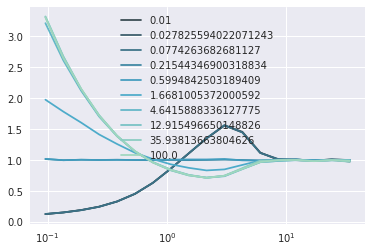

In [27]:
pname = 'conc_gal_bias'
l, h = -2, 2
#l, h = 0.0, 1.0

d = default_params.copy()
for v, c in zip(np.logspace(l,h,N), cmap):
    d[pname] = v
    #y = np.zeros((18,))
    #for i in xrange(N):
       # print i,
    cat.populate(d)
    y= cat.calc_xi(r_bins)
    print v, (y/default_y)[0]
    #y/=N
    plt.plot(rbc, y/default_y, label = v, c = c)
    
plt.xscale('log')
#plt.loglog()
plt.legend(loc = 'best')
plt.show();

In [28]:
d['conc_gal_bias'] = 50.0

In [29]:
cat.populate(d)

In [30]:
sat_cut = cat.model.mock.galaxy_table['gal_type'] == 'satellites'

In [31]:
cat.model.mock.galaxy_table.colnames

['halo_upid',
 'halo_num_centrals',
 'halo_hostid',
 'halo_local_density_10',
 'halo_y',
 'halo_x',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_num_satellites',
 'conc_NFWmodel',
 'halo_rvir',
 'halo_z',
 'halo_mvir',
 'conc_gal_bias',
 'gal_type',
 'vx',
 'conc_galaxy',
 'host_centric_distance',
 'vy',
 'y',
 'x',
 'vz',
 'z']

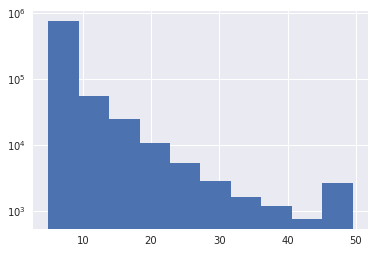

In [32]:
plt.hist(cat.model.mock.galaxy_table[sat_cut]['conc_galaxy']*1.0/cat.model.mock.galaxy_table[sat_cut]['conc_NFWmodel'])
plt.yscale('log')

In [33]:
set(cat.model.mock.galaxy_table['gal_type'])

{'centrals', 'satellites'}

In [34]:
cat.model._input_model_dictionary['satellites_profile']._conc_NFWmodel_lookup_table_min,\
cat.model._input_model_dictionary['satellites_profile']._conc_NFWmodel_lookup_table_max

(1, 99)

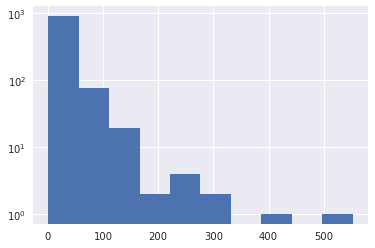

In [35]:
plt.hist(cat.halocat.halo_table['halo_nfw_conc'][np.isfinite(cat.halocat.halo_table['halo_nfw_conc'])][:1000])
plt.yscale('log')

In [36]:
finite_idxs = np.isfinite(cat.halocat.halo_table['halo_nfw_conc'])
np.sum(cat.halocat.halo_table[finite_idxs]['halo_nfw_conc']>100)*1.0/finite_idxs.shape[0]

0.002210009806906087

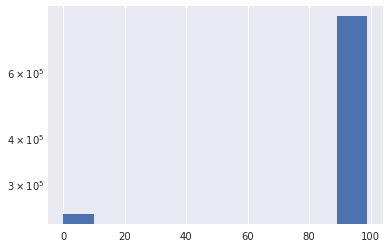

In [37]:
plt.hist(cat.model.mock.galaxy_table['conc_galaxy'])
plt.yscale('log')